In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
# import MNIST from Keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random


In [3]:
# Seed data
np.random.seed(0)

In [4]:
# import our data which are image pixels for
  # train data
  # test data set
#60000 images loaded, each image size : 28x28 pixels
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
60000


In [5]:
# data load control : to be sure that the expected data is correct  
# debugging method for complex models
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


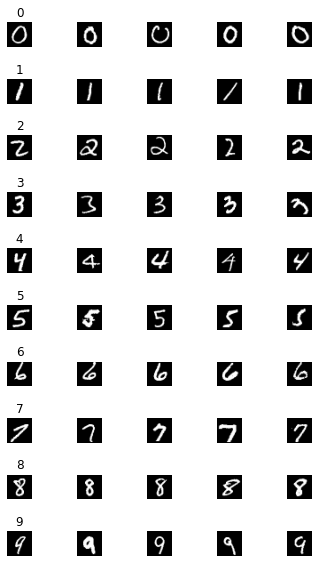

In [6]:
# image recorder 10 classes
num_of_samples = []

# create grid of digit
cols = 5 # colons
num_classes = 10 # row  : label classes
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
# plot figure layout 
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        # imshow() fun : display a selected random image (28x28)
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        # drop out the axis names for cleaning
        axs[j][i].axis("off")
        # to show the label for a appropriated class
        if i == 0:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

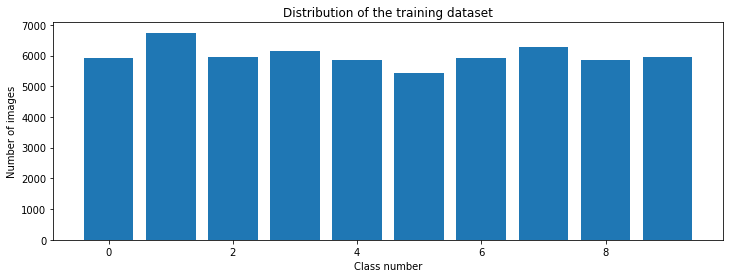

In [7]:
# print the number of the image per class
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")


In [8]:
# create a separe label applying "hot encoding" techniques 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# normalization (1 pixel : 8 Bytes => 0 - 255)
X_train = X_train/255 
X_test = X_test/255
 
num_pixels = 784
# reshape the image to a single matrix for the multiplication
X_train = X_train.reshape(X_train.shape[0], num_pixels)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# /!\ Linear NN is NOT scalable when dealing with more complexe data
model = create_model()
print(model.summary())
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.8785 - accuracy: 0.7137 - val_loss: 0.2818 - val_accuracy: 0.9125
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.9094 - val_loss: 0.2410 - val_accuracy: 0.9295
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2830 - accuracy: 0.9146 - val_loss: 0.2365 - val_accuracy: 0.9285
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.9197 - val_loss: 0.2477 - val_accuracy: 0.9267
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.9246 - val_loss: 0.2134 - val_accuracy: 0.9405
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2411 - accuracy: 0.9276 - val_loss: 0.2150 - val_accuracy: 0.9342
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2259 - accuracy: 0.9312 - val_loss: 0.2111 - val_accuracy: 0.9352
Epoch 

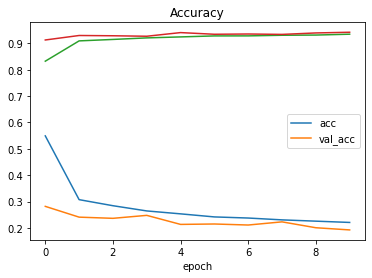

In [11]:
# Train the model clf
"""
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1, =>
    verbose=1,
    callbacks=None,
    validation_split=0.0, => 10% (0.1) of the data is used for validation 
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
"""
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
# the more the epochs we run the more the validation loss become higher than the train loss (exponentially ??)
# This is because the validation loss create generalization (GAP)!!!
# So the model start to overfitting because the memorization train data is not equal to the validation data which cause the genelization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

# The accuracy decrease because the model starts to overfitting during the generalization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
 
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predicted digit: [2]


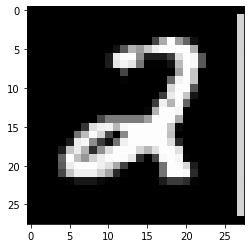

In [12]:
import requests
from PIL import Image
 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

# normalization
img = img/255
# convert the pixel input to a single matrix
img = img.reshape(1, 784)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))